In [94]:

import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
home_directory = os.path.expanduser("~")
omnetpp_directory = os.path.join(home_directory, "omnetpp-6.0.2")
vec_directory = os.path.join(omnetpp_directory, "samples", "thesis", "results")

In [96]:
dispatchingAlgos = ["Local", "Random", "RandomWalk", "Greedy", "GreedyPartition", "Proposed"]
schedulingAlgos = ["FIFO", "EDF", "EDF", "EDF", "EDF", "EDF"]

numUsers = [user for user in range(1000, 2501 , 100)]
repetition = 1
for idx, dispatchingAlgo in enumerate(dispatchingAlgos):
    for numUser in numUsers:
        for i in range(repetition):
            command_vec = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-vec.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}.vec"
            command_sca = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-sca.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}.sca"
            os.system(command_vec)
            os.system(command_sca)


Exported 501 vectors
Exported 9 scalars, 20426 parameters
Exported 501 vectors
Exported 9 scalars, 21926 parameters
Exported 501 vectors
Exported 9 scalars, 23426 parameters
Exported 501 vectors
Exported 9 scalars, 24926 parameters
Exported 501 vectors
Exported 9 scalars, 26426 parameters
Exported 501 vectors
Exported 9 scalars, 27926 parameters
Exported 501 vectors
Exported 9 scalars, 29426 parameters
Exported 501 vectors
Exported 9 scalars, 30926 parameters
Exported 501 vectors
Exported 9 scalars, 32426 parameters
Exported 501 vectors
Exported 9 scalars, 33926 parameters
Exported 501 vectors
Exported 9 scalars, 35426 parameters
Exported 501 vectors
Exported 9 scalars, 36926 parameters
Exported 501 vectors
Exported 9 scalars, 38426 parameters
Exported 501 vectors
Exported 9 scalars, 39926 parameters
Exported 501 vectors
Exported 9 scalars, 41426 parameters
Exported 501 vectors
Exported 9 scalars, 42926 parameters
Exported 501 vectors
Exported 9 scalars, 20426 parameters
Exported 501 v

In [97]:

algoCompletionRate = []
algoCompletionTime = []
algoTotalReward = []

for idx, dispatchingAlgo in enumerate(dispatchingAlgos):
    completionRateWithDiffNumUsers = []
    completionTimeWithDiffNumUsers = []
    rewardWithDiffNumUsers = []
    for numUser in numUsers:
        accumulateCompletionRate = 0
        accumulateCompletionTime = 0
        accumulateReward = 0
        for i in range(repetition):
            sca_out = pd.read_csv(f"{vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-sca.csv")
            # print(f"{dispatchingAlgo}-{schedulingAlgos[idx]}-{numUser}-{i}")
            # if i == 0:
            #     display(sca_out[(sca_out['type'] == 'scalar')])
            sca_mean_row = sca_out[(sca_out['type'] == 'scalar') & (sca_out['name'] == 'isCompleted:mean')]
            sca_mean_row = sca_out[(sca_out['type'] == 'scalar')]
            accumulateCompletionRate += float(sca_mean_row[sca_mean_row['name'] == 'isCompleted:mean'].iloc[0]['value'])
            accumulateCompletionTime += float(sca_mean_row[sca_mean_row['name'] == 'totalTime:mean'].iloc[0]['value'])
            accumulateReward += float(sca_mean_row[sca_mean_row['name'] == 'totalReward:sum'].iloc[0]['value'])
        avgCompletionRate = accumulateCompletionRate / repetition
        avgCompletionTime = accumulateCompletionTime / repetition
        avgReward = accumulateReward / repetition
        completionRateWithDiffNumUsers.append(avgCompletionRate)
        completionTimeWithDiffNumUsers.append(avgCompletionTime)
        rewardWithDiffNumUsers.append(avgReward)
    algoCompletionRate.append(completionRateWithDiffNumUsers)
    algoCompletionTime.append(completionTimeWithDiffNumUsers)
    algoTotalReward.append(rewardWithDiffNumUsers)


# Define the maximum width for each variable
dispatching_width = 10
scheduling_width = 5
completion_rate_width = 5

for idx in range(len(dispatchingAlgos)):
    print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} completionRate is ", end="")
    for j in range(len(numUsers)):
        print(f"{algoCompletionRate[idx][j]:.6f}", end=" ")
    print()

print()
for idx in range(len(dispatchingAlgos)):
    print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} completionTime is ", end="")
    for j in range(len(numUsers)):
        print(f"{algoCompletionTime[idx][j]:.6f}", end=" ")
    print()

print()
for idx in range(len(dispatchingAlgos)):
    print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} reward is ", end="")
    for j in range(len(numUsers)):
        print(f"{algoTotalReward[idx][j]}", end=" ")
    print()



Local     -FIFO  completionRate is 0.751359 0.732414 0.710281 0.685037 0.668788 0.652246 0.631402 0.616199 0.595697 0.577622 0.561054 0.547432 0.533611 0.519489 0.505594 0.491319 
Random    -EDF   completionRate is 0.902688 0.886884 0.867478 0.844740 0.819479 0.794003 0.766337 0.739380 0.711649 0.684633 0.656948 0.632151 0.608821 0.584572 0.565227 0.544064 
RandomWalk-EDF   completionRate is 0.783867 0.765779 0.750218 0.730370 0.714808 0.695799 0.674948 0.655635 0.635117 0.616032 0.593330 0.572161 0.552727 0.531373 0.511947 0.495241 
Greedy    -EDF   completionRate is 0.934268 0.925580 0.912366 0.894014 0.870961 0.843295 0.808890 0.774191 0.739772 0.705199 0.673830 0.645411 0.617918 0.592732 0.569549 0.548475 
GreedyPartition-EDF   completionRate is 0.974603 0.967918 0.959751 0.945859 0.917790 0.874498 0.825433 0.780912 0.738084 0.701117 0.667222 0.636437 0.608679 0.582762 0.558938 0.537219 
Proposed  -EDF   completionRate is 0.974603 0.967918 0.959751 0.945859 0.917790 0.874498 0.8254

In [98]:
import pandas as pd

completion_rate_data = {}
for idx, completion_rate in enumerate(algoCompletionRate):
    algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    completion_rate_data[algo_key] = completion_rate

completion_rate_df = pd.DataFrame(completion_rate_data, index=numUsers).transpose()
display(completion_rate_df)
completion_rate_df.to_csv(f"{vec_directory}/completion_rate.csv")


completion_time_data = {}
for idx, completion_time in enumerate(algoCompletionTime):
    algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    completion_time_data[algo_key] = completion_time

completion_time_df = pd.DataFrame(completion_time_data, index=numUsers).transpose()
display(completion_time_df)
completion_time_df.to_csv(f"{vec_directory}/completion_time.csv")

,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500
Local-FIFO,0.751359,0.732414,0.710281,0.685037,0.668788,0.652246,0.631402,0.616199,0.595697,0.577622,0.561054,0.547432,0.533611,0.519489,0.505594,0.491319
Random-EDF,0.902688,0.886884,0.867478,0.844740,0.819479,0.794003,0.766337,0.739380,0.711649,0.684633,0.656948,0.632151,0.608821,0.584572,0.565227,0.544064
RandomWalk-EDF,0.783867,0.765779,0.750218,0.730370,0.714808,0.695799,0.674948,0.655635,0.635117,0.616032,0.593330,0.572161,0.552727,0.531373,0.511947,0.495241
Greedy-EDF,0.934268,0.925580,0.912366,0.894014,0.870961,0.843295,0.808890,0.774191,0.739772,0.705199,0.673830,0.645411,0.617918,0.592732,0.569549,0.548475
GreedyPartition-EDF,0.974603,0.967918,0.959751,0.945859,0.917790,0.874498,0.825433,0.780912,0.738084,0.701117,0.667222,0.636437,0.608679,0.582762,0.558938,0.537219
Proposed-EDF,0.974603,0.967918,0.959751,0.945859,0.917790,0.874498,0.825433,0.780912,0.738084,0.701117,0.667222,0.636437,0.608679,0.582762,0.558938,0.537219


,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500
Local-FIFO,0.090532,0.091764,0.093189,0.094722,0.095926,0.097155,0.098415,0.099661,0.100852,0.101856,0.103002,0.104030,0.105025,0.105971,0.106864,0.107508
Random-EDF,0.097006,0.099200,0.101935,0.105142,0.108002,0.110789,0.113353,0.116034,0.118520,0.121051,0.123526,0.125451,0.127889,0.129780,0.131636,0.133423
RandomWalk-EDF,0.091762,0.093248,0.094908,0.096821,0.098375,0.100345,0.102143,0.103917,0.105777,0.107691,0.109197,0.110666,0.112118,0.113323,0.114588,0.115434
Greedy-EDF,0.094644,0.097048,0.100125,0.102945,0.106126,0.109574,0.113239,0.116822,0.119886,0.122884,0.125988,0.128651,0.131140,0.133352,0.135439,0.137528
GreedyPartition-EDF,0.063221,0.066581,0.071506,0.078810,0.088874,0.098747,0.105974,0.111484,0.116237,0.120038,0.123609,0.126774,0.129336,0.131946,0.133884,0.136203
Proposed-EDF,0.063221,0.066581,0.071506,0.078810,0.088874,0.098747,0.105974,0.111484,0.116237,0.120038,0.123609,0.126774,0.129336,0.131946,0.133884,0.136203


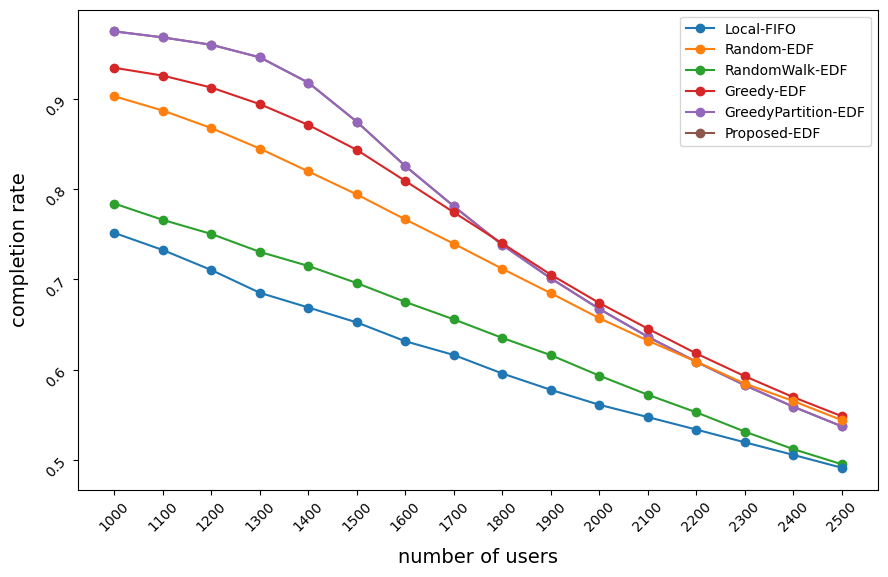

In [99]:
fig1 = plt.figure(figsize=(10,6))

columns = completion_rate_df.columns
x_values = range(len(columns))

ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
ax1.tick_params(labelrotation=45)
p0 = ax1.plot(x_values, completion_rate_df.iloc[0], marker='o', zorder=6)
p1 = ax1.plot(x_values, completion_rate_df.iloc[1], marker='o', zorder=5)
p2 = ax1.plot(x_values, completion_rate_df.iloc[2], marker='o', zorder=4)
p3 = ax1.plot(x_values, completion_rate_df.iloc[3], marker='o', zorder=3)
p4 = ax1.plot(x_values, completion_rate_df.iloc[4], marker='o', zorder=2)
p5 = ax1.plot(x_values, completion_rate_df.iloc[5], marker='o', zorder=1)
ax1.legend(handles=[p0[0], p1[0], p2[0], p3[0], p4[0], p5[0]], 
           labels=[completion_rate_df.iloc[0].name, completion_rate_df.iloc[1].name, completion_rate_df.iloc[2].name, 
                   completion_rate_df.iloc[3].name, completion_rate_df.iloc[4].name, completion_rate_df.iloc[5].name])

plt.ylabel('completion rate', labelpad=10, fontsize=14)
# plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
plt.xlabel('number of users', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
# plt.title("Completion Rate", pad=20, fontsize=16)
plt.show()
fig1.savefig(f'{vec_directory}/completion_rate_graph.svg', format="svg", bbox_inches = "tight")


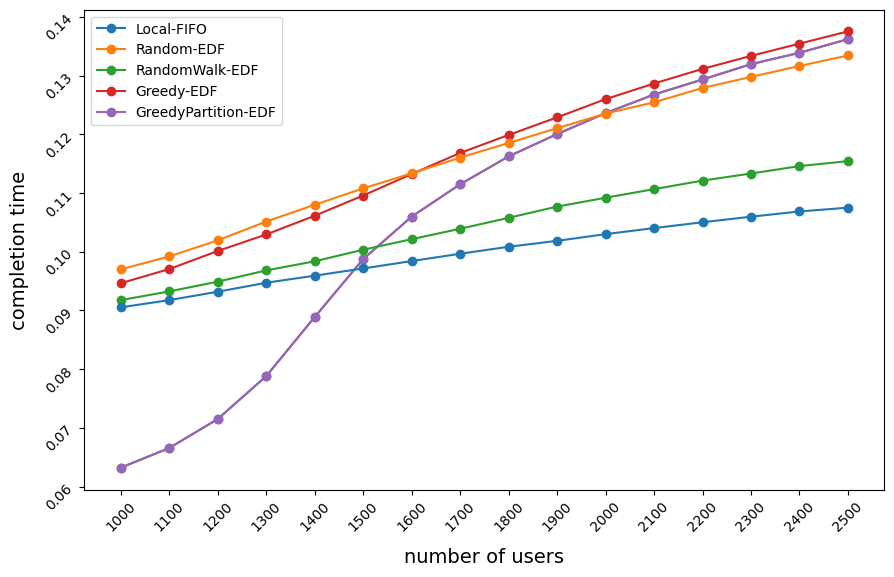

In [100]:
fig2 = plt.figure(figsize=(10,6))

columns = completion_time_df.columns
x_values = range(len(columns))

ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2.tick_params(labelrotation=45)
p0 = ax2.plot(x_values, completion_time_df.iloc[0], marker='o', zorder=6)
p1 = ax2.plot(x_values, completion_time_df.iloc[1], marker='o', zorder=5)
p2 = ax2.plot(x_values, completion_time_df.iloc[2], marker='o', zorder=4)
p3 = ax2.plot(x_values, completion_time_df.iloc[3], marker='o', zorder=3)
p4 = ax2.plot(x_values, completion_time_df.iloc[4], marker='o', zorder=2)
p5 = ax2.plot(x_values, completion_time_df.iloc[5], marker='o', zorder=1)
ax2.legend(handles=[p0[0], p1[0], p2[0], p3[0], p4[0], p5[0]], 
           labels=[completion_time_df.iloc[0].name, completion_time_df.iloc[1].name, completion_time_df.iloc[2].name, 
                   completion_time_df.iloc[3].name, completion_time_df.iloc[4].name, completion_time_df.iloc[5].name])

plt.ylabel('completion time', labelpad=10, fontsize=14)
# plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
plt.xlabel('number of users', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
# plt.title("Completion Time", pad=20, fontsize=16)
plt.show()
fig2.savefig(f'{vec_directory}/completion_time_graph.svg', format="svg", bbox_inches = "tight")



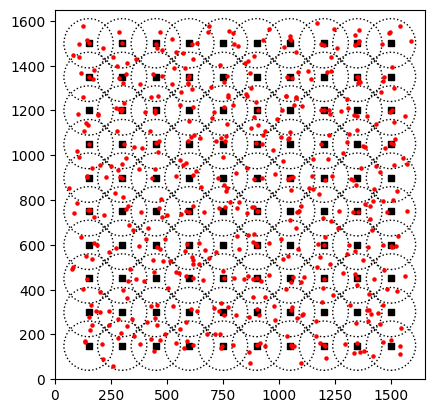

In [101]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y

# Define the dimensions of the grid
num_rows = 10
num_columns = 10

# Define the distance between each base station
distance = 150

# Initialize lists to store x and y coordinates of base stations
base_station_x_coords = []
bast_station_y_coords = []

# Generate coordinates for each base station
for x in range(distance, (num_rows + 1) * distance, distance):
    for y in range(distance, (num_columns + 1) * distance, distance):
        base_station_x_coords.append(x)
        bast_station_y_coords.append(y)

# Plot the base stations
for x, y in zip(base_station_x_coords, bast_station_y_coords):
    plt.scatter(x, y, color='black', marker='s', s=20)
    circle = plt.Circle((x, y), 110, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

# Generate random coordinates for users
num_users = 500  # Number of users
num_users_per_region = num_users // (num_rows * num_columns)
user_x_coords = []
user_y_coords = []
for base_station_x, base_station_y in zip(base_station_x_coords, bast_station_y_coords):
    for i in range(num_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


# Plot the users
plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5)

# Set labels and title
# plt.xlabel('X Axis (m)')
# plt.ylabel('Y Axis (m)')
# plt.title('Base Stations Grid with Users')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

# Show the graph

plt.show()

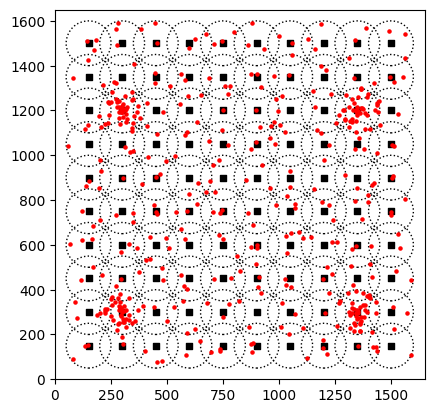

In [102]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y

# Define the dimensions of the grid
num_rows = 10
num_columns = 10

# Define the distance between each base station
distance = 150

# Initialize lists to store x and y coordinates of base stations
base_station_x_coords = []
bast_station_y_coords = []

# Generate coordinates for each base station
for y in range(distance, (num_columns + 1) * distance, distance):
    for x in range(distance, (num_rows + 1) * distance, distance):
        base_station_x_coords.append(x)
        bast_station_y_coords.append(y)

# Plot the base stations
for x, y in zip(base_station_x_coords, bast_station_y_coords):
    plt.scatter(x, y, color='black', marker='s', s=20)
    circle = plt.Circle((x, y), 100, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

# Generate random coordinates for users
user_x_coords = []
user_y_coords = []


num_users = 500  # Number of users
hotspot_percent = 0.3

hotspot_idx = [11,18,71,78]
hotspot_users_per_region = math.floor(num_users * hotspot_percent / len(hotspot_idx))
for idx in hotspot_idx:
    for i in range(hotspot_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x_coords[idx], bast_station_y_coords[idx], 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


users_per_region = math.floor(num_users * (1 - hotspot_percent) / (num_rows * num_columns))
for base_station_x, base_station_y in zip(base_station_x_coords, bast_station_y_coords):
    for i in range(users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


# Plot the users
plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5)

# Set labels and title
# plt.xlabel('X Axis (m)')
# plt.ylabel('Y Axis (m)')
# plt.title('Base Stations Grid with Users')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

# Show the graph

plt.show()